In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/daiv_dataset_final_final_preprocessed.csv', encoding='UTF-8')

# StandardScaler 사용
scaler = StandardScaler()

y = data.iloc[:, [6]]
X = data.drop(columns=data.columns[:8])

# StandardScaler 사용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X

,gender,heparin,clopidogrel,insulin,digoxin,sprionolactone,bumetanide,torsemide,furosemide,metolazone,...,magnesium_max,magnesium_min,hematocrit_min,hemoglobin_max,hematocrit_max,platelet_count_mean,urea_nitrogen_mean,platelet_count_min,hematocrit_mean,race_encoded
0,0,0,0,0,0,0,0,0,0,0,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.168196
1,0,1,0,1,0,0,0,0,1,0,...,1.800000,1.700000,28.500000,11.500000,35.400000,190.000000,16.333300,176.000000,32.680000,0.587577
2,1,1,0,1,0,0,0,1,0,0,...,1.918279,1.918279,39.300000,12.900000,39.300000,95.000000,43.500000,95.000000,39.300000,0.587577
3,1,1,0,1,0,0,0,0,0,0,...,2.100000,1.900000,30.400000,12.300000,37.700000,571.000000,14.400000,535.000000,32.928600,0.587577
4,1,1,0,1,0,0,0,0,0,0,...,2.200000,2.000000,35.300000,12.600000,37.400000,317.000000,15.500000,316.000000,36.350000,0.587577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19395,0,1,0,1,0,0,0,0,0,0,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.587577
19396,0,1,0,1,0,0,0,0,0,0,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.587577
19397,0,1,0,1,0,0,0,0,0,0,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.587577
19398,0,1,0,1,0,0,0,0,0,0,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.587577


In [ ]:
# cad_icd_code 열 처리
selected_column_cad = y['cad_icd_code']
binary_labels_cad = selected_column_cad.notna().astype(int)
y['binary_cad_icd_code'] = binary_labels_cad


# 원본 열 삭제
y = y.drop(columns=['cad_icd_code'])

<ipython-input-4-972a5516ad81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['binary_cad_icd_code'] = binary_labels_cad


In [ ]:
y

,binary_cad_icd_code
0,0
1,1
2,1
3,1
4,0
...,...
19395,1
19396,1
19397,1
19398,1


In [ ]:
# 데이터를 8:2 비율로 훈련 및 테스트 세트로 분할하고 셔플링
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

**RUSBoost**

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

# RUSBoost 모델 훈련
rusboost_model = RUSBoostClassifier(random_state=0)
rusboost_model.fit(train_X, train_y)

# 테스트 데이터에 대한 예측 확률
y_pred_proba_rusboost = rusboost_model.predict_proba(test_X)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 정확도 측정
y_pred = rusboost_model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7134020618556701


In [ ]:
# AUC 성능 측정
auc_score = roc_auc_score(test_y, y_pred_proba_rusboost)
print("AUC Score:", auc_score)

AUC Score: 0.7642923076923076


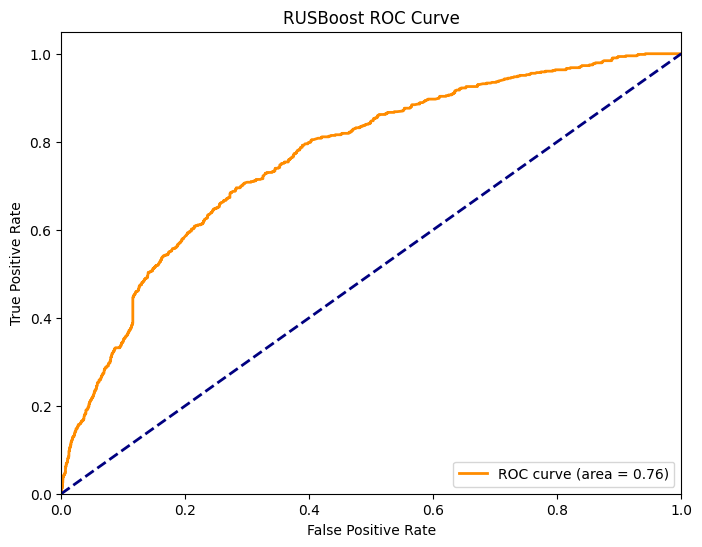

In [ ]:
# AUC-ROC 곡선 시각화
fpr, tpr, _ = roc_curve(test_y, y_pred_proba_rusboost)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RUSBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

**EasyEnsemble**

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

easyensemble_model = EasyEnsembleClassifier(random_state=0)
easyensemble_model.fit(train_X, train_y)

# 테스트 데이터에 대한 예측 확률
y_pred_proba_easyensemble = easyensemble_model.predict_proba(test_X)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# AUC 성능 측정
auc_score = roc_auc_score(test_y, y_pred_proba_easyensemble)
print("AUC Score:", auc_score)

# 정확도 측정
y_pred = easyensemble_model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

AUC Score: 0.7725863247863248
Accuracy: 0.7087628865979382


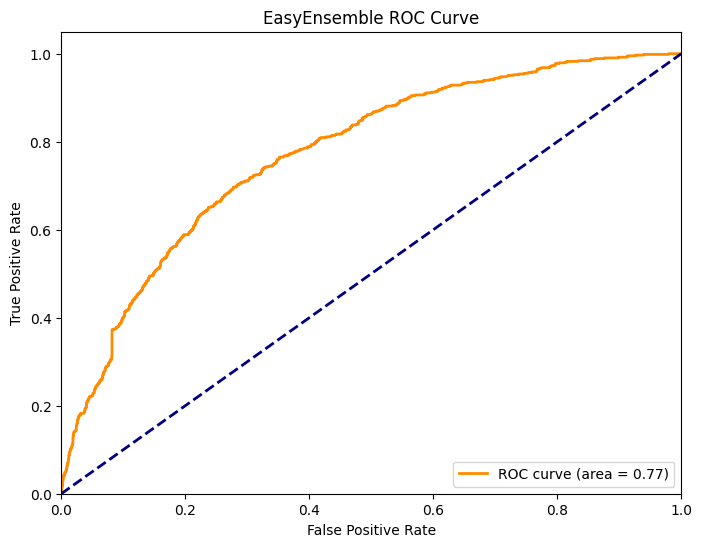

In [ ]:
# AUC-ROC 곡선 시각화
fpr, tpr, _ = roc_curve(test_y, y_pred_proba_easyensemble)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('EasyEnsemble ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링 수행
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=0)
X_resampled, y_resampled = undersampler.fit_resample(train_X, train_y)

# Random Forest 모델 훈련
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(X_resampled, y_resampled)

# 테스트 데이터에 대한 예측 확률
y_pred_proba_random_forest = random_forest_model.predict_proba(test_X)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# AUC 성능 측정
auc_score = roc_auc_score(test_y, y_pred_proba_random_forest)
print("AUC Score:", auc_score)

# 정확도 측정
y_pred = random_forest_model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

AUC Score: 0.7692056166056167
Accuracy: 0.6969072164948453


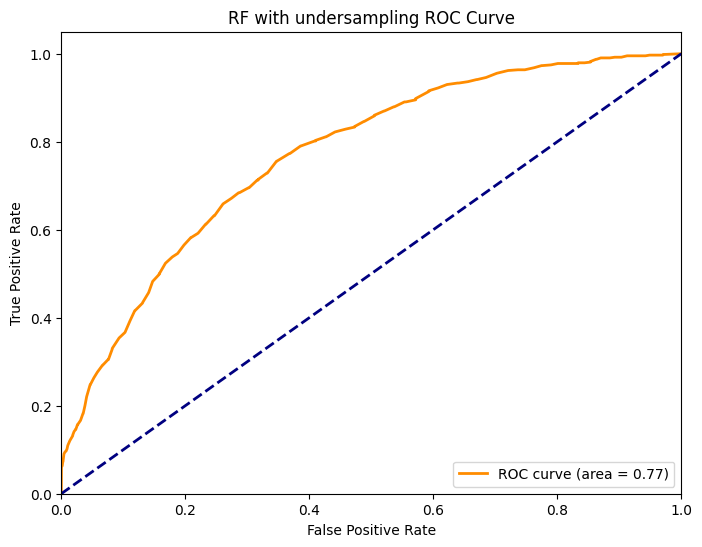

In [ ]:
# AUC-ROC 곡선 시각화
fpr, tpr, _ = roc_curve(test_y, y_pred_proba_random_forest)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF with undersampling ROC Curve')
plt.legend(loc='lower right')
plt.show()

**BalancedRandomForest**

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf_model = BalancedRandomForestClassifier(random_state=0)
brf_model.fit(train_X, train_y)

y_pred_proba_brf = brf_model.predict_proba(test_X)[:, 1]

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# AUC 성능 측정
auc_score_brf = roc_auc_score(test_y, y_pred_proba_brf)
print("BalancedRandomForest AUC Score:", auc_score_brf)

# 정확도 측정
y_pred_brf = brf_model.predict(test_X)
accuracy_brf = accuracy_score(test_y, y_pred_brf)
print("BalancedRandomForest Accuracy:", accuracy_brf)

BalancedRandomForest AUC Score: 0.7719203907203908
BalancedRandomForest Accuracy: 0.6987113402061855


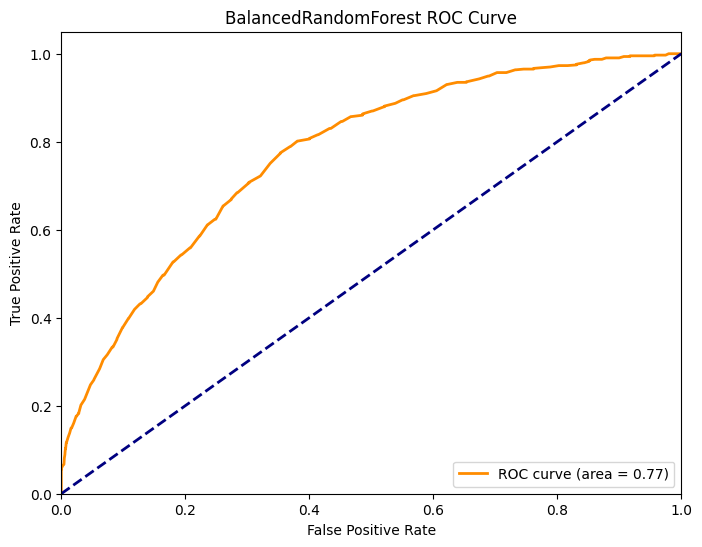

In [ ]:
# AUC-ROC 곡선 시각화
fpr_brf, tpr_brf, _ = roc_curve(test_y, y_pred_proba_brf)
roc_auc_brf = auc(fpr_brf, tpr_brf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_brf, tpr_brf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_brf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BalancedRandomForest ROC Curve')
plt.legend(loc='lower right')
plt.show()

**BalancedBagging**

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

# BalancedBaggingClassifier를 사용한 코드
bbc_model = BalancedBaggingClassifier(random_state=0)
bbc_model.fit(train_X, train_y)

# 테스트 데이터에 대한 예측 확률
y_pred_proba_bbc = bbc_model.predict_proba(test_X)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# AUC 성능 측정
auc_score_bbc = roc_auc_score(test_y, y_pred_proba_bbc)
print("BalancedBaggingClassifier AUC Score:", auc_score_bbc)

# 정확도 측정
y_pred_bbc = bbc_model.predict(test_X)
accuracy_bbc = accuracy_score(test_y, y_pred_bbc)
print("BalancedBaggingClassifier Accuracy:", accuracy_bbc)

BalancedBaggingClassifier AUC Score: 0.7526940170940173
BalancedBaggingClassifier Accuracy: 0.7639175257731958


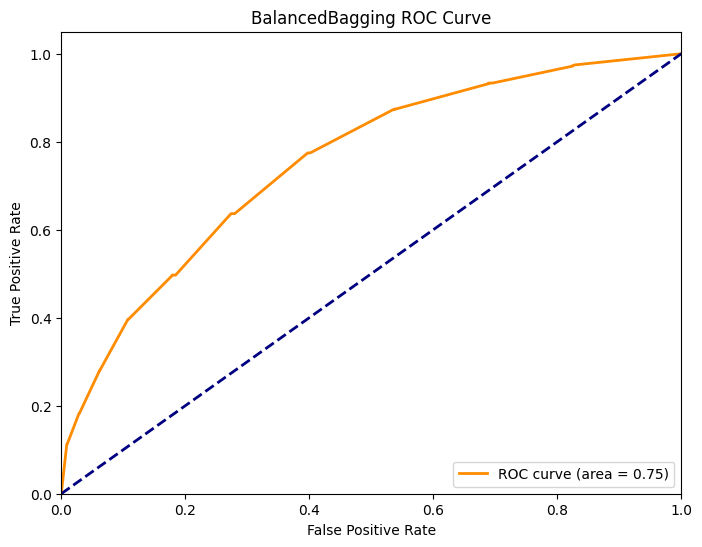

In [ ]:
# AUC-ROC 곡선 시각화
fpr_bbc, tpr_bbc, _ = roc_curve(test_y, y_pred_proba_bbc)
roc_auc_bbc = auc(fpr_bbc, tpr_bbc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_bbc, tpr_bbc, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_bbc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BalancedBagging ROC Curve')
plt.legend(loc='lower right')
plt.show()